In [1]:
import matplotlib.pyplot as plt
import numpy as np

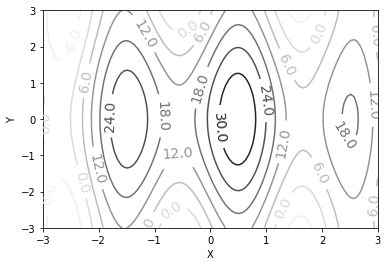

In [2]:
# 最適化する関数zの可視化

# 関数の定義
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)

X, Y = np.meshgrid(x, y) #マス目，座標行列
Z = 0.1*(X**2+Y**2-16)**2 + 10*np.sin(3*X) # zは山の高さ

# グラフのプロット
plt.figure()
cont = plt.contour(X, Y, Z, cmap="Greys")
cont.clabel(fmt='%1.1f', fontsize=14)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [3]:
# ベイズ最適化
import GPy
import GPyOpt
import numpy as np

# 最適化する関数
def f(variable):
    x,y = variable[:,0], variable[:,1]
    return -0.1*(x**2+y**2-16)**2 + 10*np.sin(3*x)

# 状態変数の幅
bounds = [{'name': 'x', 'type': 'continuous', 'domain': (-3,3)},
                 {'name': 'y', 'type': 'continuous', 'domain': (-3,3)}]

In [4]:
#ベイズ最適化：Lower Confidence Bound
Bopt_LCB = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds, initial_design_numdata=5, acquisition_type='LCB')
Bopt_LCB.run_optimization(max_iter=50) 

# 探索履歴の保存
result_x = Bopt_LCB.X
result_z = -Bopt_LCB.Y

# 最適値の出力
print(Bopt_LCB.x_opt) #(x,y)
print(-Bopt_LCB.fx_opt) #x

[-0.48894758 -0.00141763]
34.78670284236854


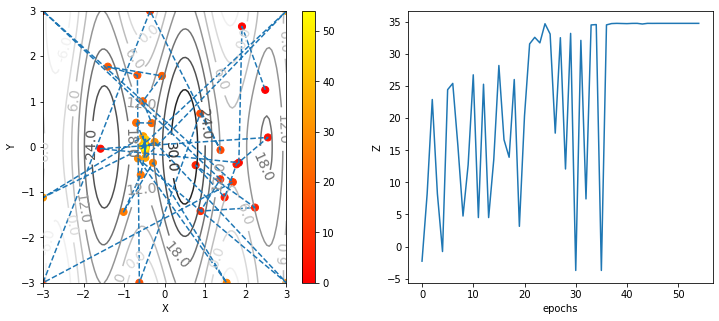

In [5]:
# 探索履歴の可視化
fig = plt.figure(figsize=(12,5)) #inch

plt.subplot(121)
cont = plt.contour(X, Y, Z, cmap="Greys")
cont.clabel(fmt='%1.1f', fontsize=14)
plt.xlabel("X")
plt.ylabel("Y")
sc = plt.scatter(result_x[:,0], result_x[:,1],s=50,
                            c=range(len(result_x)),cmap="autumn")
plt.colorbar(sc)
plt.plot(result_x[:,0], result_x[:,1], linestyle="dashed")

plt.subplot(122)
plt.plot(result_z)
plt.xlabel("epochs")
plt.ylabel("Z")
plt.show()

fig.tight_layout()

In [6]:
#ベイズ最適化：expected improvement
Bopt_EI = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds, initial_design_numdata=5, acquisition_type='EI')
Bopt_EI.run_optimization(max_iter=50) 

# 探索履歴の保存
result_x = Bopt_EI.X
result_z = -Bopt_EI.Y

# 最適値の出力
print(Bopt_EI.x_opt) #(x,y)
print(-Bopt_EI.fx_opt) #x

[-0.47966667  0.08928991]
34.7571722471274


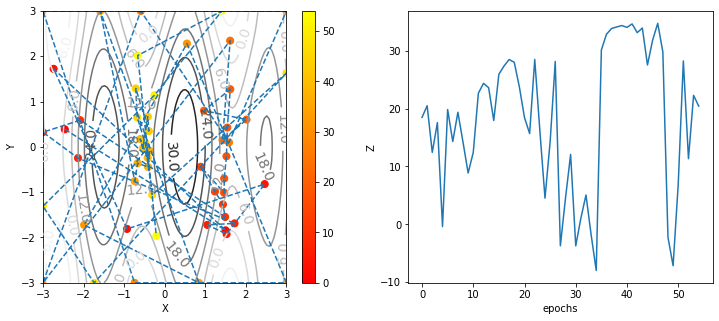

In [7]:
# 探索履歴の可視化
fig = plt.figure(figsize=(12,5)) #inch

plt.subplot(121)
cont = plt.contour(X, Y, Z, cmap="Greys")
cont.clabel(fmt='%1.1f', fontsize=14)
plt.xlabel("X")
plt.ylabel("Y")
sc = plt.scatter(result_x[:,0], result_x[:,1],s=50,
                            c=range(len(result_x)),cmap="autumn")
plt.colorbar(sc)
plt.plot(result_x[:,0], result_x[:,1], linestyle="dashed")

plt.subplot(122)
plt.plot(result_z)
plt.xlabel("epochs")
plt.ylabel("Z")
plt.show()

fig.tight_layout()

In [8]:
#ベイズ最適化：maximum probability of improvement
Bopt_MPI = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds, initial_design_numdata=5, acquisition_type='MPI')
Bopt_MPI.run_optimization(max_iter=50) 

# 探索履歴の保存
result_x = Bopt_MPI.X
result_z = -Bopt_MPI.Y

# 最適値の出力
print(Bopt_MPI.x_opt) #(x,y)
print(-Bopt_MPI.fx_opt) #x

[-0.53443072  0.97451141]
31.794390597592916


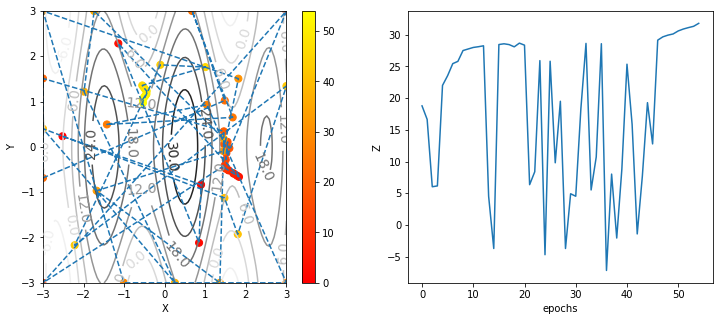

In [9]:
# 探索履歴の可視化
fig = plt.figure(figsize=(12,5)) #inch

plt.subplot(121)
cont = plt.contour(X, Y, Z, cmap="Greys")
cont.clabel(fmt='%1.1f', fontsize=14)
plt.xlabel("X")
plt.ylabel("Y")
sc = plt.scatter(result_x[:,0], result_x[:,1],s=50,
                            c=range(len(result_x)),cmap="autumn")
plt.colorbar(sc)
plt.plot(result_x[:,0], result_x[:,1], linestyle="dashed")

plt.subplot(122)
plt.plot(result_z)
plt.xlabel("epochs")
plt.ylabel("Z")
plt.show()

fig.tight_layout()

LCB(UCB)が良さげやな